In [14]:
import pandas as pd
import numpy as np
from scipy.cluster.vq import kmeans,vq
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [27]:
glosy_data=pd.read_csv("clustering_data/kad8_glos_for_clustering.csv")
partie_data=pd.read_csv("kad8/partie.csv")

In [28]:
partie_data['prawdziwa']=partie_data.mode(1)

In [32]:
Z = linkage(glosy_data.drop('posel',1), metric='cityblock')

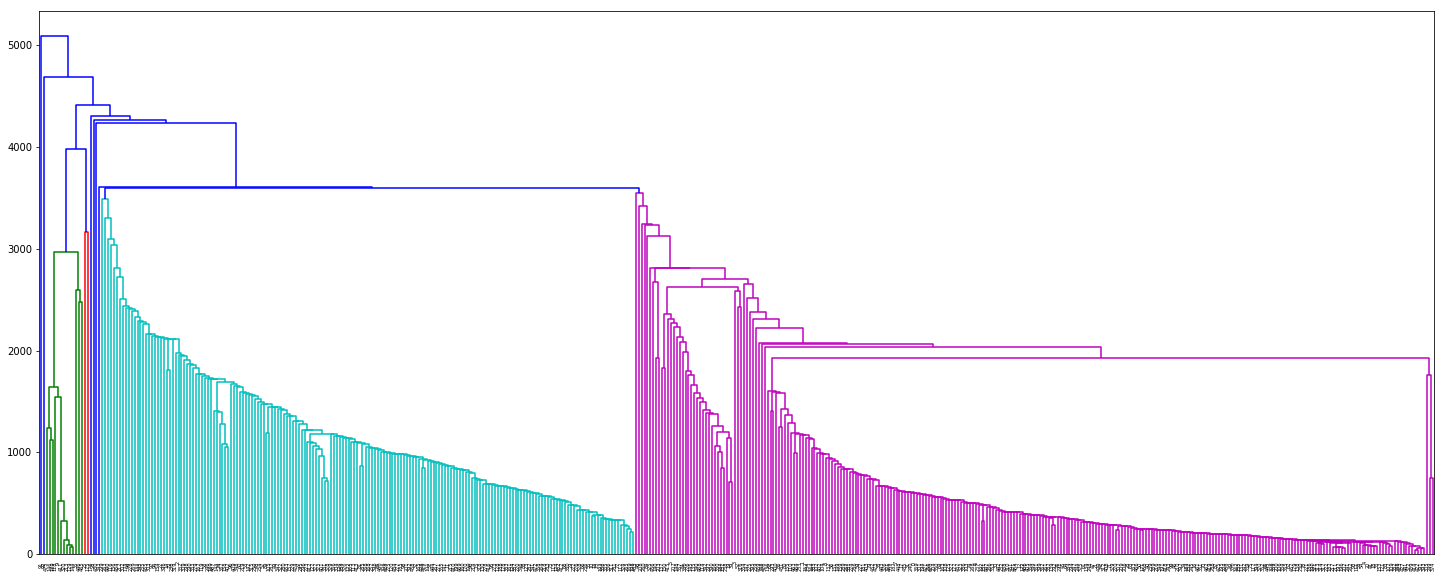

In [33]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

In [34]:
d_max=4300
partie_data['single']=fcluster(Z, d_max, criterion='distance')

In [35]:
partie_data.groupby('single')['prawdziwa'].agg(lambda x:x.value_counts().index[0])

single
1    PiS
2    PiS
3     PO
4     PO
Name: prawdziwa, dtype: object

In [37]:
partie_data.groupby('single').size()

single
1     15
2    459
3      1
4      1
dtype: int64

In [43]:
Z=linkage(glosy_data.drop('posel',1),'ward')

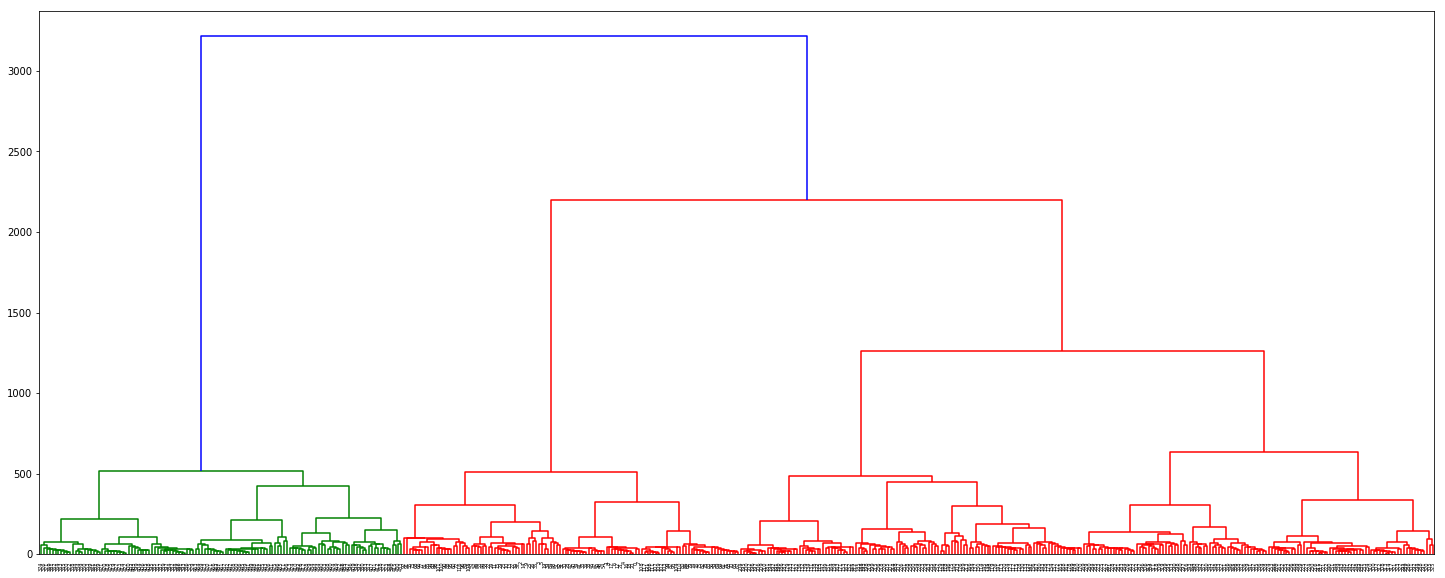

In [44]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

In [47]:
k=4
partie_data['ward']=fcluster(Z, k, criterion='maxclust')

In [48]:
partie_data.groupby('ward')['prawdziwa'].agg(lambda x:x.value_counts().index[0])

ward
1    PiS
2    PiS
3    PiS
4    PiS
Name: prawdziwa, dtype: object

In [50]:
partie_data.groupby('ward').size()

ward
1    124
2    115
3    117
4    120
dtype: int64

In [60]:
Z = linkage(glosy_data.drop('posel',1), 'average','cityblock')

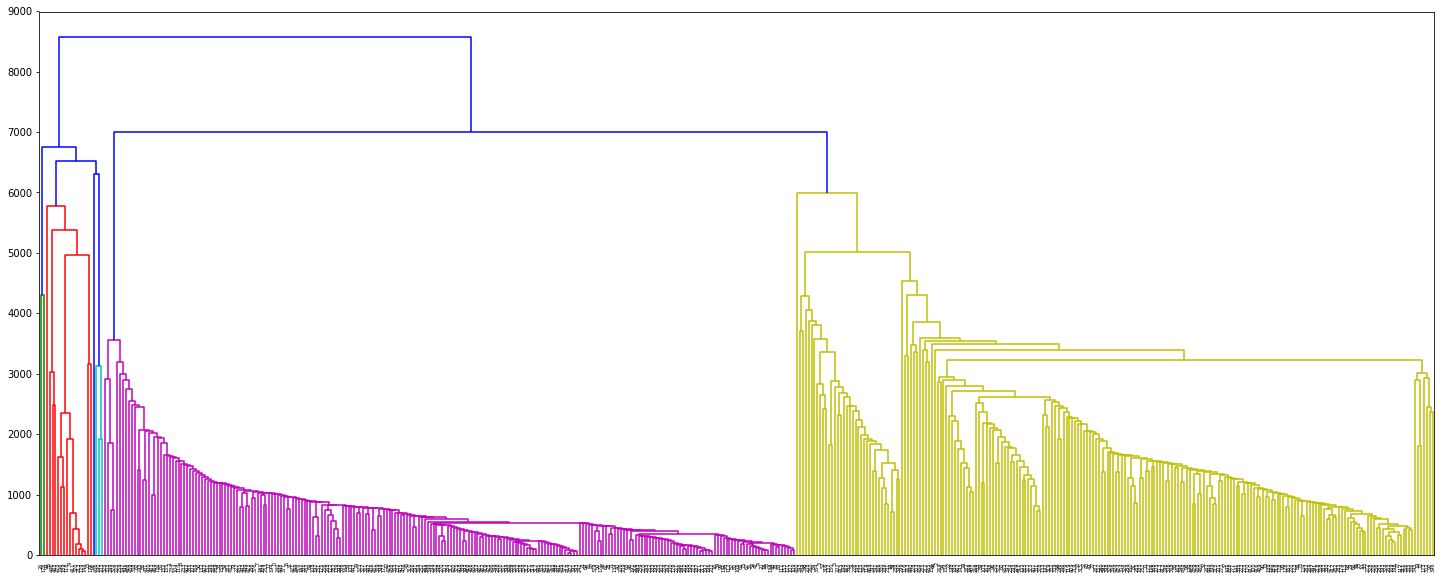

In [61]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

In [62]:
k=3
partie_data['average']=fcluster(Z, k, criterion='maxclust')

In [63]:
partie_data.groupby('average')['prawdziwa'].agg(lambda x:x.value_counts().index[0])

average
1    PiS
2    PiS
3     PO
Name: prawdziwa, dtype: object

In [64]:
partie_data.groupby('average').size()

average
1     22
2    236
3    218
dtype: int64

In [59]:
Z = linkage(glosy_data.drop('posel',1), 'centroid')

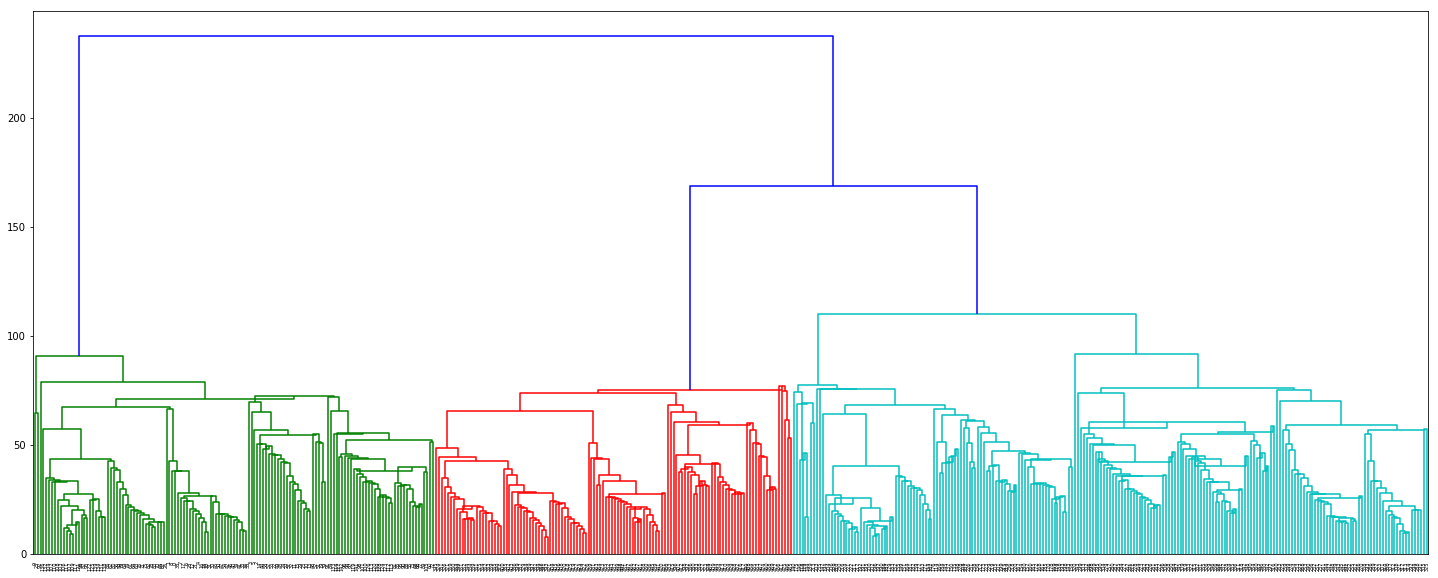

In [54]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

In [55]:
k=3
partie_data['centroid']=fcluster(Z, k, criterion='maxclust')

In [56]:
partie_data.groupby('centroid')['prawdziwa'].agg(lambda x:x.value_counts().index[0])

centroid
1    PiS
2    PiS
3    PiS
Name: prawdziwa, dtype: object

In [57]:
partie_data.groupby('centroid').size()

centroid
1    137
2    122
3    217
dtype: int64